# 6.3.2 (텐서플로 케라스) 신경망 모델
[플로우가 보이는 머신러닝 프로젝트] 4장 참조

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: mount failed

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/기말고사 과제/Bike-standard.csv')
df.head(3)

,Temperature,Humidity,Wind speed,Visibility,Solar Radiation,Rented Bike B,Functioning Day,Holiday,Date_1.0,Date_2.0,...,Hour_17.0,Hour_18.0,Hour_19.0,Hour_20.0,Hour_21.0,Hour_22.0,Hour_23.0,Seasons_1.0,Seasons_2.0,Seasons_3.0
0,-1.513763,-1.042744,0.464888,0.925668,-0.655063,0.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,-1.538879,-0.993626,-0.896149,0.925668,-0.655063,0.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-1.580738,-0.944508,-0.701715,0.925668,-0.655063,0.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df.shape

(8751, 47)

In [ ]:
df.isna().any()[lambda x: x]   # 결측값을 갖고 있는 변수명(컬럼명) 찾기

Series([], dtype: bool)

In [ ]:
data = df.drop(['Rented Bike B'], axis=1)   # 타겟변수를 제외한 입력변수를 data에 저장
target = df['Rented Bike B']                # 타겟변수만 target에 저장

# 50:50 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.5, random_state=42)   # test_size=0.5임에 주의

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (4375, 46)
X_test shape: (4376, 46)


In [ ]:
type(X_train)

pandas.core.frame.DataFrame

In [ ]:
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()

y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

In [ ]:
print(X_train_np)

[[-0.96959034 -0.89539072  0.56210543 ...  1.          0.
   0.        ]
 [ 1.00617563  0.5290238   0.46488845 ...  0.          1.
   0.        ]
 [-0.86075578  0.13608187 -0.02119643 ...  1.          0.
   0.        ]
 ...
 [ 1.15686964  1.16755445 -0.41006434 ...  0.          1.
   0.        ]
 [-1.39655672 -0.25686007 -0.41006434 ...  0.          0.
   1.        ]
 [ 0.18573044  1.11843671 -0.89614922 ...  0.          0.
   0.        ]]


In [ ]:
X_train_np.shape

(4375, 46)

In [ ]:
print(y_train_np)

[0. 1. 0. ... 1. 0. 0.]


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
# 활성화 함수 relu, 옵티마이저 adam

In [ ]:
# 참조 코딩. 필요시 사용 가능
import random as python_random

np.random.seed(123)
python_random.seed(123)
tf.random.set_seed(1234)

In [ ]:
# 활성화 함수 relu
model = tf.keras.Sequential([
  layers.Dense(100, activation='relu', input_shape=[46]),
  layers.Dropout(.5),
  layers.Dense(100, activation='relu'),
  layers.Dropout(.5),
  layers.Dense(1, activation = 'sigmoid')
])

In [ ]:
# 옵티마이저 adam
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
# 다음 코딩에 약 30초 소요
# 텐서플로 케라스 신경망 모델은 매번 실행시 모델 결과가 조금씩 다를 수 있음에 유의

In [ ]:
print(X_train_np.shape)

(4375, 46)


In [ ]:
from tensorflow import keras
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint('Ch8-NN1.tf', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, monitor='val_accuracy',
                                                  restore_best_weights=True)

history = model.fit(X_train_np, y_train_np,
                    validation_split=0.25,
                    shuffle=True,
                    epochs=30,
                    callbacks = [checkpointer, early_stopping_cb]
                    )

Epoch 1/30
103/103 [==============================] - 4s 22ms/step - loss: 0.5365 - accuracy: 0.7236 - val_loss: 0.4059 - val_accuracy: 0.8062
Epoch 2/30
103/103 [==============================] - 1s 11ms/step - loss: 0.4132 - accuracy: 0.8165 - val_loss: 0.3437 - val_accuracy: 0.8528
Epoch 3/30
103/103 [==============================] - 1s 11ms/step - loss: 0.3546 - accuracy: 0.8500 - val_loss: 0.2980 - val_accuracy: 0.8830
Epoch 4/30
103/103 [==============================] - 1s 11ms/step - loss: 0.3163 - accuracy: 0.8689 - val_loss: 0.2741 - val_accuracy: 0.8912
Epoch 5/30
103/103 [==============================] - 1s 13ms/step - loss: 0.2905 - accuracy: 0.8772 - val_loss: 0.2561 - val_accuracy: 0.8958
Epoch 6/30
103/103 [==============================] - 2s 16ms/step - loss: 0.2726 - accuracy: 0.8921 - val_loss: 0.2452 - val_accuracy: 0.9013
Epoch 7/30
103/103 [==============================] - 2s 18ms/step - loss: 0.2696 - accuracy: 0.8891 - val_loss: 0.2287 - val_accuracy: 0.9049

In [ ]:
# 참고 코딩
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               4700      
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 14901 (58.21 KB)
Trainable params: 14901 (58.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


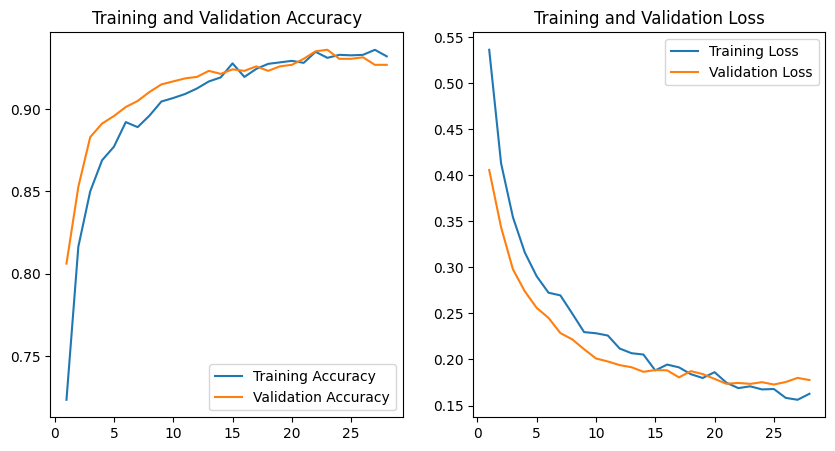

In [ ]:
# 매 epochs마다 모델 정확도와 손실을 그래프로 그립니다.
import matplotlib.pyplot as plt

acc = history.history['accuracy']         # 모델의 학습 정확도를 변수 acc에 저장
val_acc = history.history['val_accuracy'] # 모델의 검증 정확도를 변수 val_acc에 저장
loss=history.history['loss']              # 모델의 학습 손실을 변수 loss에 저장
val_loss=history.history['val_loss']      # 모델의 검증 손실을 변수 val_loss에 저장


# epochs가 17회가 아닌 다른 결과(예:15회)로 나오면 아래 줄 17을 해당 숫자인 15로 바꿔주야 함에 유의
epochs_range = range(1, 28+1)             # epochs가 17회까지만 수행된 것을 반영

# 학습 정확도와 검증 정확도 그리기
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# 학습 손실와 검증 손실 그리기
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# model.fit() 실행시 검증 정확도가 가장 높은 에포크에 해당하는 모델 가중치 계수 불러오기
model.load_weights('Ch8-NN1.tf')

In [ ]:


test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("test accuracy:", test_accuracy)

137/137 [==============================] - 0s 2ms/step - loss: 0.1930 - accuracy: 0.9170
test accuracy: 0.9170475602149963


In [ ]:
# 참고 계산
10247/32

320.21875

In [ ]:
y_prob = model.predict(X_test)
y_prob.round(2)

137/137 [==============================] - 0s 1ms/step


array([[0.06],
       [0.95],
       [0.  ],
       ...,
       [0.99],
       [0.  ],
       [0.  ]], dtype=float32)

In [ ]:
from sklearn.metrics import roc_auc_score

y_prob = model.predict(X_test)
ROC_AUC = roc_auc_score(y_test, y_prob)
print("ROC AUC on test set:{:.5f}".format(ROC_AUC))

137/137 [==============================] - 0s 2ms/step
ROC AUC on test set:0.97865
